<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/invariance_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Invariance fundamentals

So what’s invariance? In the context of neural networks, it means that the outcome
(the prediction) is unchanged when the input is transformed. In the context of training
an image classifier, image augmentation can be used to train a model to recognize
an object regardless of the object’s size and location in the image, without the need
for additional training data.

Let’s consider a CNN that is an image classifier (this analogy can also be applied to
object detection). We want the object being classified to be correctly recognized
regardless of its location in the image. If we transform the input so that the object is
shifted to a new location in the image, we want the outcome (the prediction) to
remain unchanged.

For CNNs and imaging in general, the primary types of invariance we want the
model to support are translational and scale invariance.

One approach to training for translational/scale invariance is simply to have
enough images per class (per object), so that the object is in different locations in the image, different rotations, different scales, and different view angles. Well, this may
not be practical to collect.

It turns out there is a straightforward method of autogenerating translational/
scale invariant images using image augmentation preprocessing, which is performed
efficiently using matrix operations. 

Matrix-based transforms can be done by a variety
of Python packages, such as the TF.Keras ImageDataGenerator class, TensorFlow
tf.image module, or OpenCV.

<img src='https://github.com/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/9.png?raw=1' width='800'/>

It depicts a typical image augmentation pipeline when feeding training
data to a model. For each batch drawn, a random subset of the images in the batch are
selected for augmentation (for example, 50%). Then, this randomly selected subset of
images is randomly transformed according to certain constraints, such as a randomly
selected rotation value from –30 to 30 degrees. The modified batch (originals plus
augmented) is then fed to the model for training.



##Setup

In [1]:
import numpy as np
import cv2, imutils

from PIL import Image, ImageOps
from matplotlib import pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget -q https://github.com/rahiakela/computer-vision-research-and-practice/raw/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/apple.jpg

##Translational invariance

How to manually augment images in a training dataset such
that the model learns to recognize the object in the image regardless of its location in
the image. 

For example, we want the model to recognize a horse regardless of which
direction the horse faces in the image, or an apple regardless of where in the background
the apple is located.

Translational invariance in the context of image input includes the following:
- Vertical/horizontal location (object can be anywhere in the picture)
- Rotation (object can be at any rotation)

A vertical/horizontal transformation is typically performed either as a matrix roll
operation or a crop. An orientation (for example, mirror) is typically performed as a
matrix flip. A rotation is typically handled as a matrix transpose.

###Image Flip

A matrix flip transforms an image by flipping it either on the vertical or horizontal axis.
Since the image data is represented as a stack of 2D matrices (one per channel), a flip
can be done efficiently as a matrix transpose function without changes (such as interpolation)
of the pixel data.

<img src='https://github.com/rahiakela/computer-vision-research-and-practice/blob/main/deep-learning-patterns-and-practices/4-training-fundamentals/images/10.png?raw=1' width='800'/>

Let’s start by showing how to flip an image by using the popular imaging libraries in Python.

Let's see how to flip an image vertically (mirror) and
horizontally by using a matrix transpose method in Python’s PIL imaging library?

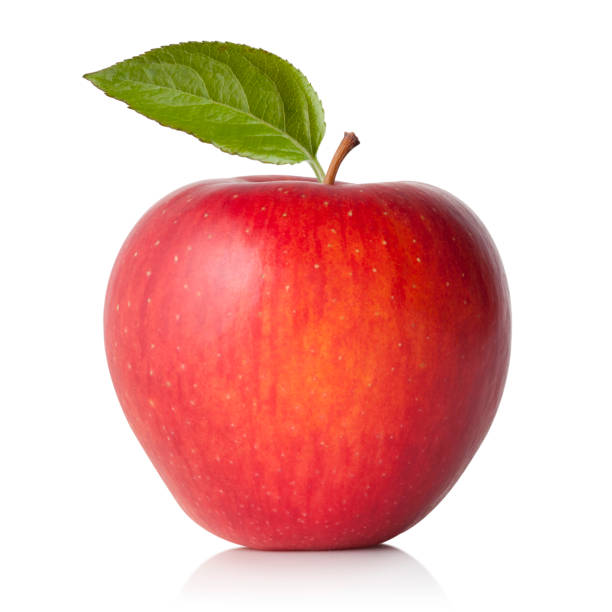

In [4]:
image = Image.open("apple.jpg")
image

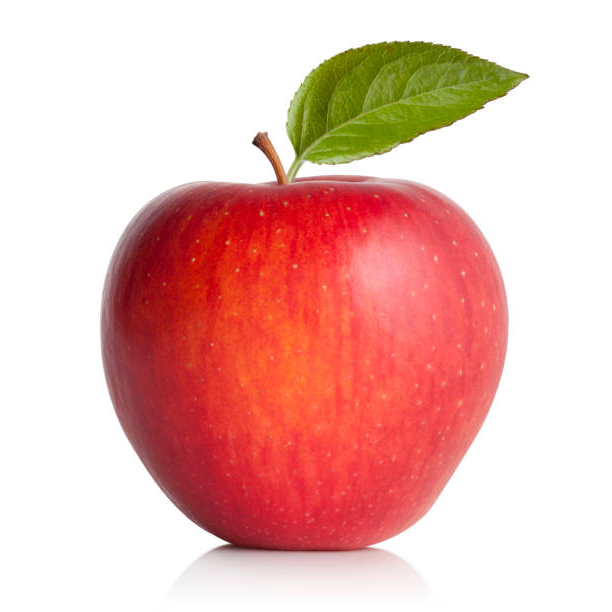

In [5]:
# Flips the image on the vertical axis (mirror)
flip = image.transpose(Image.FLIP_LEFT_RIGHT)
flip

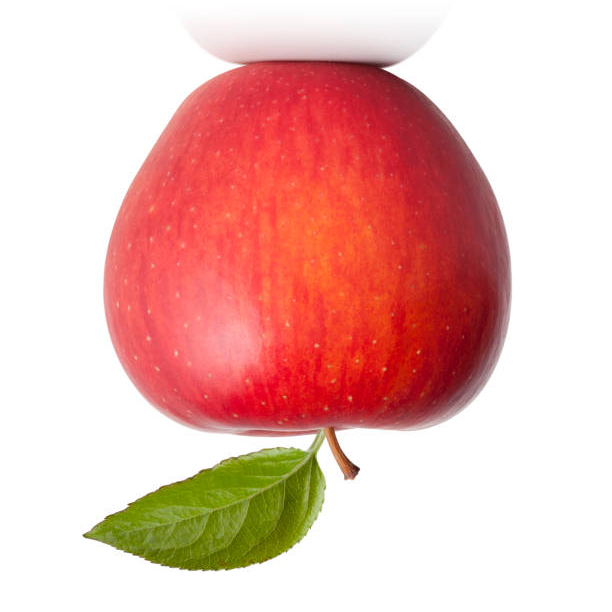

In [6]:
# Flips the image on the horizontal axis (upside down)
flip = image.transpose(Image.FLIP_TOP_BOTTOM)
flip

Alternately, the flips can be done using the PIL class ImageOps module.

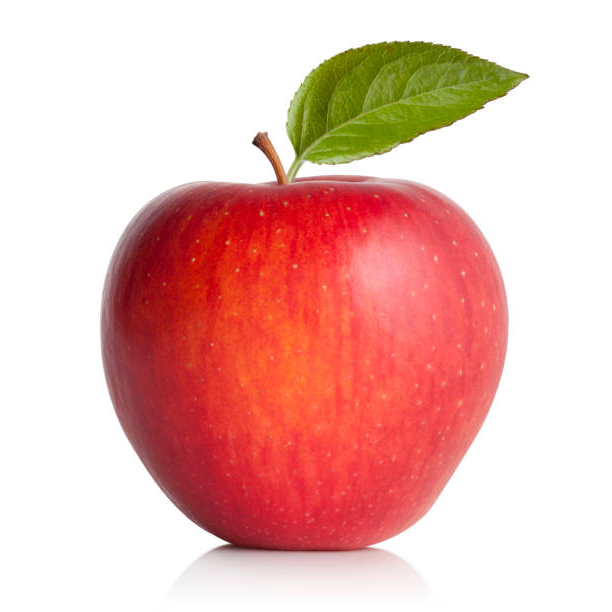

In [7]:
image = Image.open("apple.jpg")

# Flips the image on the vertical axis (mirror)
flip = ImageOps.mirror(image)
flip

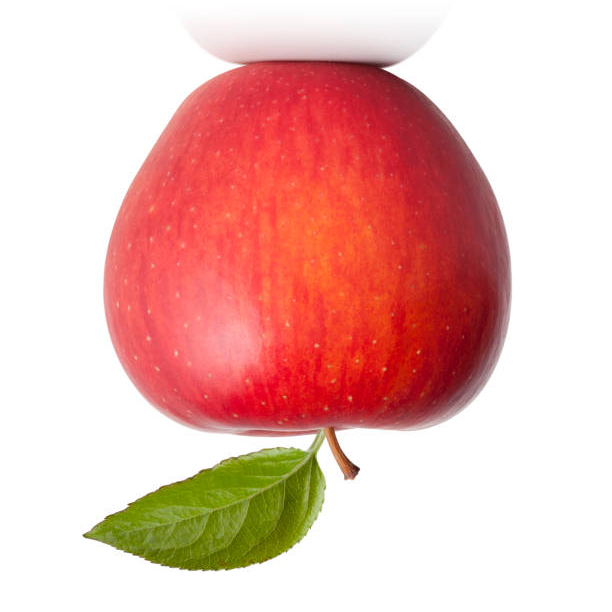

In [8]:
# Flips the image on the horizontal axis (upside down)
flip = ImageOps.flip(image)
flip

Let's see how to flip an image vertically (mirror) and horizontally
by using a matrix transpose method in OpenCV?

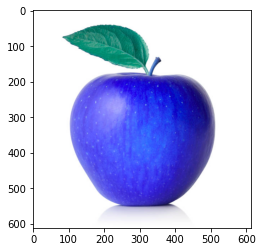

In [9]:
image = cv2.imread("apple.jpg")
# Displays the image in its original perspective
plt.imshow(image)

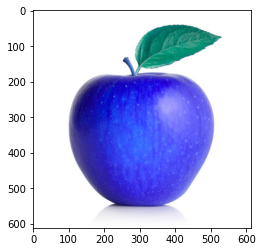

In [10]:
# Flips the image on the vertical axis (mirror)
flip = cv2.flip(image, 1)
plt.imshow(flip)

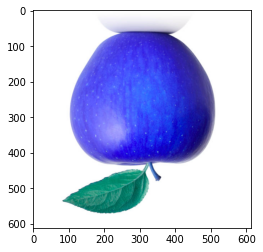

In [11]:
# Flips the image on the horizontal axis (upside down)
flip = cv2.flip(image, 0)
plt.imshow(flip)

Now, let's see how to flip an image vertically (mirror) and horizontally by
using a matrix transpose method in NumPy?

In [12]:
image = cv2.imread("apple.jpg")

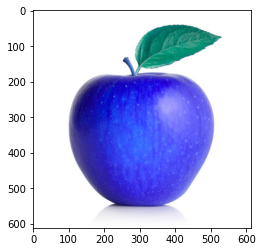

In [13]:
# Flips the image on the vertical axis (mirror)
flip = np.flip(image, 1)
plt.imshow(flip)

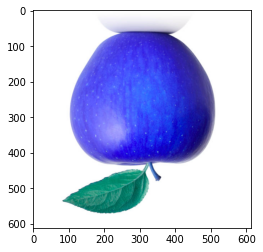

In [14]:
# Flips the image on the horizontal axis (upside down)
flip = np.flip(image, 0)
plt.imshow(flip)

###Image Rotation 90/180/270